<a href="https://colab.research.google.com/github/school-shenanigans/cat-1/blob/master/CAT_1_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description:

`Number of Instances`
20640

`Number of Attributes`
8 numeric, predictive attributes and the target

`Attribute Information`

*   MedInc median income in block
*   HouseAge median house age in block
*   AveRooms average number of rooms
*   AveBedrms average number of bedrooms
*   Population block population
*   AveOccup average house occupancy
*   Latitude house block latitude
*   Longitude house block longitude

`Missing Attribute Values`
None


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import linear_model,metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Preprocessing:

> `Missing Values` There were no missing values

> `Encoding` All the data we were dealing with was already numerical therefore there was no need for encoding.

> `Feature Selection`**not sure what to right here because our data already came with the relevant features and target.

> `Feature Extraction`



In [ ]:
data = fetch_california_housing()
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [ ]:
df_X = pd.DataFrame(data = data.data, columns = data.feature_names)
df_y = pd.DataFrame(data = data.target, columns =['SalePrice'])
print(df_X.shape)
print(df_y.shape)
# cd = pd.concat([df_X,df_y],axis = 1 )
df_X

(20640, 8)
(20640, 1)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# there are no missing feature and target values
df_X.isna().sum()
df_y.isna().sum()

SalePrice    0
dtype: int64

In [ ]:
# there are no duplicates in the dataset
df_X.duplicated().sum()

0

In [ ]:
x = df_X.values
y = df_y.values
X = PowerTransformer().fit_transform(x)
y = PowerTransformer().fit_transform(y)
print(y.shape)
print(x.shape)

(20640, 1)
(20640, 8)


In [ ]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(X)
pca_with_varia.n_components_

6

In [ ]:
pca = PCA(n_components=3)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2','PC3'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,PC3,SalePrice
0,2.339323,-1.029495,-1.833506,1.715878
1,1.621925,-1.619071,0.372829,1.281389
2,2.333480,-1.056456,-1.692510,1.247506
3,2.165364,0.052684,-1.376361,1.188835
4,2.335353,0.364186,-1.407326,1.193798
...,...,...,...,...
20635,1.689388,0.977962,0.783628,-1.414289
20636,1.970410,-0.406708,0.368609,-1.433165
20637,1.708682,0.531152,1.023623,-1.160803
20638,1.981453,0.391902,0.559898,-1.293200


In [ ]:
pca.explained_variance_ratio_

array([0.25800719, 0.21359309, 0.15324088])

In [ ]:
final_data.describe()

,PC1,PC2,PC3,SalePrice
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.755486e-15,8.643092e-17,2.288436e-16,1.140173e-15
std,1.436717e+00,1.307221e+00,1.107242e+00,1.000024e+00
min,-4.079664e+00,-6.037672e+00,-5.363526e+00,-2.997447e+00
25%,-1.211293e+00,-8.470487e-01,-7.684092e-01,-7.379200e-01
50%,-4.100618e-01,3.632690e-02,-6.248331e-04,-1.611421e-02
75%,1.428849e+00,8.638140e-01,7.419161e-01,7.085479e-01
max,4.793707e+00,8.061784e+00,6.426060e+00,1.898584e+00


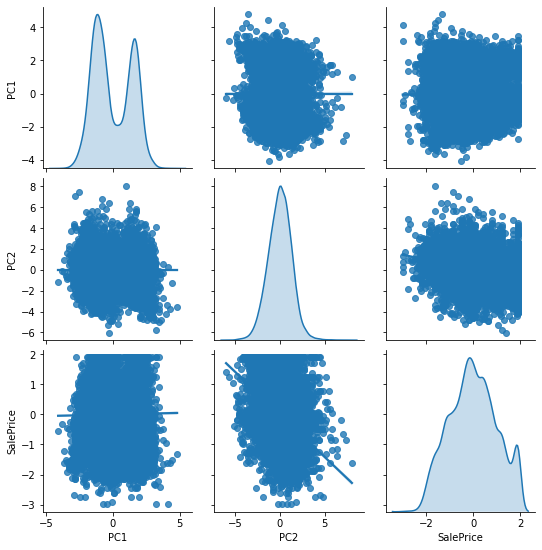

In [ ]:
sns.pairplot(final_data,kind='reg', diag_kind='kde')

In [ ]:
X = final_data.drop(['SalePrice'], axis = 1)
y = final_data['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=4)


In [ ]:
result = {}
models = {
    'Linear Regression' : linear_model.LinearRegression(),
    'Lasso' : linear_model.Lasso(),
    "Ridge" : linear_model.Ridge(),
    'ElasticNet' : linear_model.ElasticNet(),
    'BayesianRidge' : linear_model.BayesianRidge(),
    
}
for i in models:
  models[i].fit(X_train, y_train)
  accuracy = models[i].score(X_test,y_test)
  result[i] = [accuracy]
pd.DataFrame(result)

,Linear Regression,Lasso,Ridge,ElasticNet,BayesianRidge
0,0.601029,0.286907,0.601031,0.420441,0.601038


In [ ]:
kfold = KFold(n_splits=4)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,Linear Regression,Lasso,Ridge,ElasticNet,BayesianRidge
0,0.603604,0.29099,0.603631,0.425599,0.603669


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid=lasso_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,Linear Regression,Lasso,Ridge,ElasticNet,BayesianRidge
0,0.603604,0.590771,0.603631,0.425599,0.603669


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.5960562152997899
Best Params are  {'tol': 1e-06, 'max_iter': 2000, 'alpha': 0.02}


,Linear Regression,Lasso,Ridge,ElasticNet,BayesianRidge
0,0.603604,0.590771,0.603631,0.425599,0.603669


In [ ]:
regressor.score(X_test,y_test)

0.6010380183975368